## linear regression with gradient descent

### Theory

the relationship between dependant and independant variables is given by

$\hat{y} = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + ... + \theta_n * x_n$  

where 

* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the ith feature value
* $\theta_j$ is the jth model parameter
* $\theta_0$ is the bias weight while $\theta_1$ to $\theta_n$ are feature weights

in simple linear regression we have only one independant variable x1

#### vectorized / linear algebra form

$\hat{y} = \theta^{T}.x$

where

* $\theta$ is the model parameter vector containing bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$
* $\theta^{T}$ is the transpose of parameter vector (row vector instead of column vector)
* $x$ is that instance's feature vector containing $x_0$ to $x_n$ where $x_0$ is always 

#### MSE cost function

$MSE(X) = \frac{1}{m} * \sum_{i=1}^{m}{(\theta^T.x^{(i)} - y^{(i)})}$

where

* $X$ is the entire dataset
* $m$ is the number if instances in the dataset
* $x^{(i)}$ is the feature vector of ith instance in the dataset
* $y^{(i)}$ is the desired output for that instance

#### Normal equation / analytical method

$\hat{\theta} = (X^T.X)^{-1}.X^T.y$

where

* $\hat{\theta}$ is the value of $\theta$ minimizing the cost function

#### gradient descent

for gradient descent we have to calculate partial derivate of cost function wrt each model parameter

$\frac{\partial{MSE(\theta)}}{\partial{\theta_j}} = \frac{2}{m}\sum_{i=1}^{m}{(\theta^T.x^{(i)}-y^{(i)})}x^{(i)}_{j}$

we can calculate gradients of all model parameters wrt cost function in one computation using the equation

$\nabla MSE(\theta) = \frac{2}{m}X^{T}.(X.\theta - y) $

where

* $\nabla MSE(\theta)$ is the gradient vector containing gradients of all model parameters wrt cost function

to calculate next value of parameter vectors

$\theta^{(next step)} = \theta - \eta\nabla MSE(\theta)$ 

where

* $\eta$ is the learning rate

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
from sklearn import datasets

dataset = datasets.load_diabetes()

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)

m = len(df.index)
print(m)
df.head()

442


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


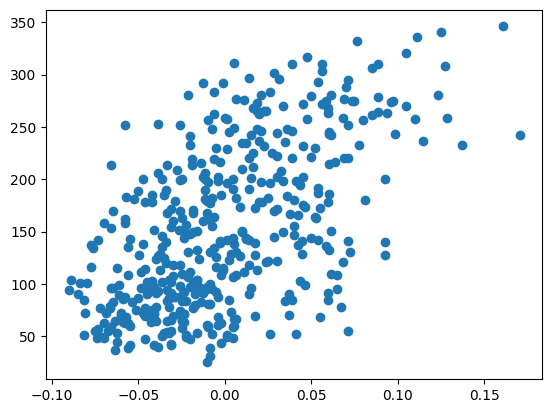

In [250]:
# using linear regression
x_label = 'bmi'
y_label = 'target'
plt.scatter(df[x_label],df[y_label])
plt.show()

In [251]:
# extracting X and y

# converting y into column matrix

y = df[y_label].to_numpy().reshape(m,1)

# y as 2d column matrix
print(y[:5,:])

# x as column matrix
X = df[x_label].to_numpy().reshape(m,1)

print(X[:5,:])

# adding 1 to x
X_new = np.hstack((np.ones((m,1)), X))
print(X_new[:5,:])

[[151.]
 [ 75.]
 [141.]
 [206.]
 [135.]]
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]
[[ 1.          0.06169621]
 [ 1.         -0.05147406]
 [ 1.          0.04445121]
 [ 1.         -0.01159501]
 [ 1.         -0.03638469]]


[[152.13348416]
 [949.43526038]]


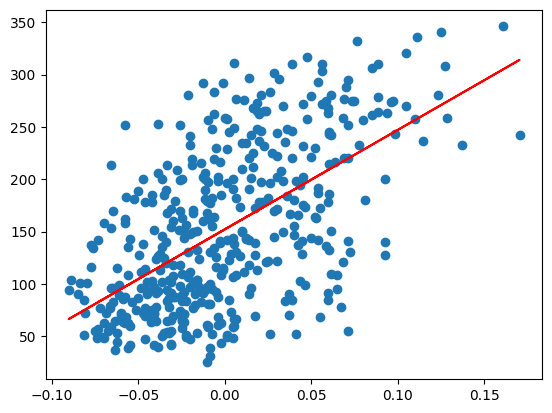

In [258]:
# analytical method
theta_best = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)
print(theta_best)
y_pred = X_new.dot(theta_best)

# plotting
plt.scatter(X,y)
plt.plot(X,y_pred, color="red")
plt.show()

[152.13348416] [[949.43526038]]


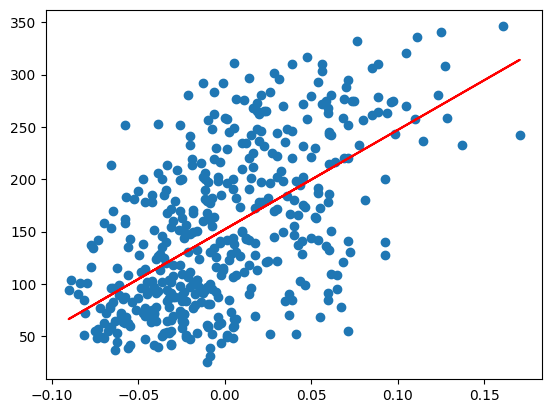

In [259]:
# using skitlearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_pred = lin_reg.predict(X)
# plotting
plt.scatter(X,y)
plt.plot(X,y_pred, color="red")
plt.show()

[[152.13348416]
 [939.14959924]]


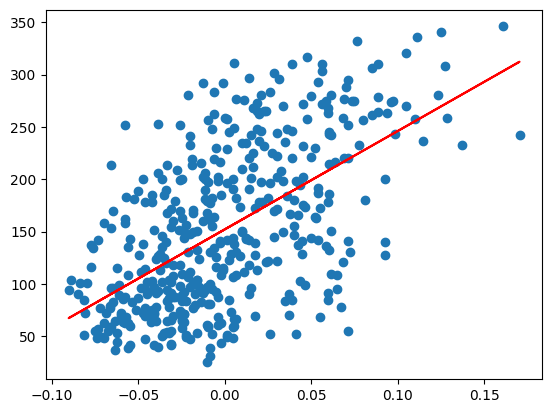

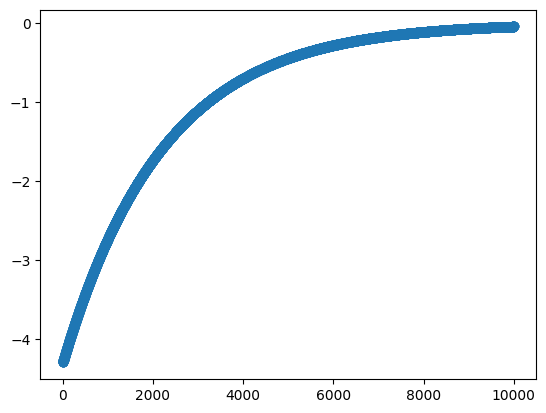

In [261]:
# using gradient descent
# these values of learning rate and iterations are specific to this dataset
# for other datasets try tweaking these values till you get good enough predictions
eta = 0.1
n_iterations = 10000

theta = np.random.randn(2,1)

# for plots
iters = []
grads = []

for iteration in range(n_iterations):
    gradients = 2/m * X_new.T.dot(X_new.dot(theta) - y)
    theta = theta - eta * gradients
    # for gradient descent plots
    iters.append(iteration)
    grads.append(gradients[1,0])

print(theta)
y_pred = X_new.dot(theta)

# plotting
plt.scatter(X,y)
plt.plot(X,y_pred, color="red")
plt.show()

# gradient plot
plt.scatter(iters, grads)
plt.show()